In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [83]:
df = pd.read_csv("diabetes.csv")

In [84]:
df = df.dropna()

In [85]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [86]:
Y = df['Outcome']

In [87]:
X = df.iloc[:,:-1]

In [88]:
df =  pd.DataFrame(scaler.fit_transform(X),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [89]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.634065,0.831628,0.137981,0.898196,-0.694509,0.197413,0.471658,1.417418
1,-0.849279,-1.121984,-0.180568,0.522184,-0.694509,-0.706810,-0.370597,-0.195486
2,1.227402,1.916968,-0.286751,-1.295211,-0.694509,-1.133086,0.608983,-0.110596
3,-0.849279,-0.997945,-0.180568,0.146171,0.114192,-0.513048,-0.932100,-1.044383
4,-0.255942,-1.339052,-1.030031,0.710190,0.062573,-0.138441,-0.684917,-0.619934
...,...,...,...,...,...,...,...,...
738,1.524071,1.513842,0.244164,0.647521,-0.694509,1.540830,-0.211911,0.823190
739,1.524071,-0.997945,-0.392934,-1.295211,-0.694509,-1.236426,-1.008391,-0.025707
740,1.820740,-0.625829,0.350346,1.712890,0.854068,0.106991,-0.919894,2.520983
741,0.337396,-0.005634,0.137981,0.146171,0.269050,-0.758480,-0.694072,-0.280376


In [90]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.to_numpy(),Y,test_size=1/3,random_state=42, stratify=Y)

print("X_train = {}, X_test = {}, y_train = {}, y_test = {}".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

X_train = (495, 8), X_test = (248, 8), y_train = (495,), y_test = (248,)


In [114]:
from scipy.stats import mode
class KNNmodel:
    def euclidean(self,v1,v2):
        dist = np.sqrt(np.sum((v1-v2)**2))
        return dist
    def fit(self,X_train,Y_train):
        self.X_train = np.array(X_train)
        self.Y_train = np.array(Y_train)
    def predict(self,X_test,k):
        predicted_outcomes = []
        for v2 in X_test:
            distances = np.array([self.euclidean(v1,v2) for v1 in self.X_train])
            dist = np.argsort(distances)[:k]
            labels = np.array([self.Y_train[a] for a in dist])
            label = mode(labels)[0]
            predicted_outcomes.append(label)
        return predicted_outcomes        

In [144]:
from sklearn.metrics import classification_report, accuracy_score
knn = KNNmodel()
knn.fit(X_train,y_train)
accuracy_scores = []
for k in range(1,20):
  predicted_vals = knn.predict(np.array(X_test), k)
  accuracy = accuracy_score(y_test, predicted_vals)
  accuracy_scores.append(accuracy)
  # report = classification_report(y_test, predicted_vals)
  print("For k = {}\n".format(k), accuracy)

For k = 1
 0.7338709677419355
For k = 2
 0.7338709677419355
For k = 3
 0.7298387096774194
For k = 4
 0.7016129032258065
For k = 5
 0.7298387096774194
For k = 6
 0.7379032258064516
For k = 7
 0.7379032258064516
For k = 8
 0.7258064516129032
For k = 9
 0.7459677419354839
For k = 10
 0.7459677419354839
For k = 11
 0.7661290322580645
For k = 12
 0.75
For k = 13
 0.7741935483870968
For k = 14
 0.7540322580645161
For k = 15
 0.7661290322580645
For k = 16
 0.7661290322580645
For k = 17
 0.7580645161290323
For k = 18
 0.7620967741935484
For k = 19
 0.7620967741935484


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


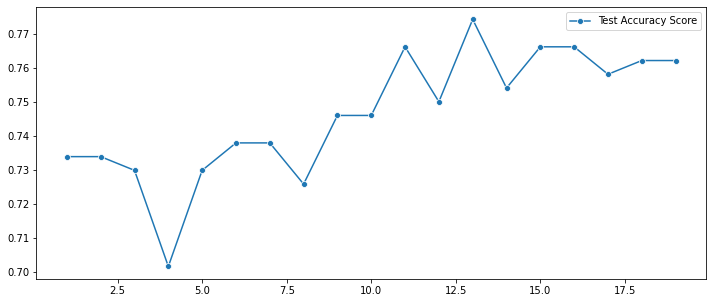

In [145]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,20),accuracy_scores,marker='o',label='Test Accuracy Score')

In [120]:
from sklearn.neighbors import KNeighborsClassifier

In [148]:
accuracy_scores_inbuilt = []
for k in range(1,20):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,pred)
    accuracy_scores_inbuilt.append(accuracy)
    print("For k = {}\n".format(k),accuracy)

For k = 1
 0.7338709677419355
For k = 2
 0.7338709677419355
For k = 3
 0.7298387096774194
For k = 4
 0.7016129032258065
For k = 5
 0.7298387096774194
For k = 6
 0.7379032258064516
For k = 7
 0.7379032258064516
For k = 8
 0.7258064516129032
For k = 9
 0.7459677419354839
For k = 10
 0.7459677419354839
For k = 11
 0.7661290322580645
For k = 12
 0.75
For k = 13
 0.7741935483870968
For k = 14
 0.7540322580645161
For k = 15
 0.7661290322580645
For k = 16
 0.7661290322580645
For k = 17
 0.7580645161290323
For k = 18
 0.7620967741935484
For k = 19
 0.7620967741935484


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


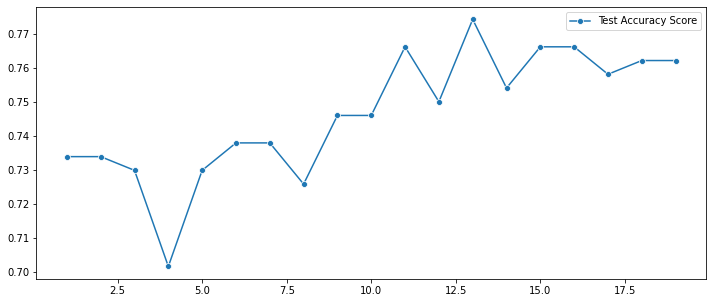

In [149]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,20),accuracy_scores_inbuilt,marker='o',label='Test Accuracy Score')